<a href="https://colab.research.google.com/github/antoinebachand/Derivatives-and-risk-management/blob/main/PCA_Explicit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
#%% Imports
import numpy as np
import matplotlib.pyplot as plt

In [97]:
#%% Parameters for the Simulation and Choleski Decomposition
mu_1 = 0
mu_2 = 0
sig_1 = 2
sig_2 = 5
rho = 0.5

var_1 = sig_1**2
var_2 = sig_2**2
cov_12 = rho*sig_1*sig_2
Sigma = np.array([[var_1, cov_12], [cov_12, var_2]])
mu = np.array([[mu_1, mu_2]]).T

A = np.array([[sig_1, 0], [sig_2*rho, sig_2*np.sqrt(1 - rho**2)]])
chol_Sigma = np.linalg.cholesky(Sigma)

print(Sigma)
#print(A)
#print(chol_Sigma)
print(A@A.T)

[[ 4.  5.]
 [ 5. 25.]]
[[ 4.  5.]
 [ 5. 25.]]


[[-1.07133875  0.72319011  2.60800009  1.89416193 -1.40747047]
 [-5.16843434  0.26878255  5.95806809 -0.80542276 -3.64365394]]


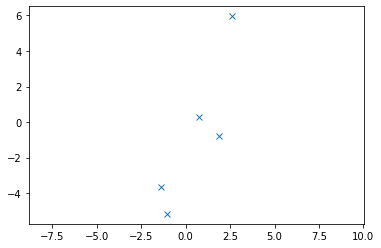

In [98]:
#%% Generate Bivariate Random Numbers
n = 2
seed = 0
rng = np.random.default_rng(seed)
# This uses the random numbers in the same order as rng.multivariate normal for comparison
# Alternatively: Z = rng.standard_normal((2, n)), which is correct but can't be compared
Z = rng.standard_normal(2*n)
Z = np.reshape(Z, (n, 2)).T
X = np.tile(mu, (1, n)) + A@Z

# Test: Theoretical bivariate normal numbers vs numpy bivariate normal numbers
rng = np.random.default_rng(seed)
X_int = rng.multivariate_normal([mu_1, mu_2], Sigma, n, method='cholesky').T
assert (abs(X - X_int) < eps).all(), "RError: Theoretical bivariate normal numbers inconsistent with Numpy bivariate normal numbers."

#%% Create Data Generating Function
def bivariate_normal_samples(n, mu_1, mu_2, sig_1, sig_2, rho):
    mu = np.array([[mu_1, mu_2]]).T
    A = np.array([[sig_1, 0], [sig_2*rho, sig_2*np.sqrt(1 - rho**2)]])
    Z = rng.standard_normal((2, n))
    X = np.tile(mu, (1, n)) + A@Z
    return X

n = 5
rho = 0.9
X = bivariate_normal_samples(n, mu_1, mu_2, sig_1, sig_2, rho)
plt.plot(X[0, :], X[1, :], 'x')
plt.axis('equal')

print(X)

In [99]:
# Spectral Decomposition

#%% Perform PCA on True Covariance Matrix
eig_values, eig_vectors = np.linalg.eig(Sigma)

#print(Sigma)

# Sort from largest to smallest
sort_idx = eig_values.argsort()[::-1] # Indices for sorting from largest to smallest
Lambda = np.diag(eig_values[sort_idx])
Gamma = eig_vectors[:, sort_idx]

print(Sigma)
print(Gamma)
print(Lambda)
cov = Gamma@(Lambda)@(Gamma.T)
print(cov)

[[ 4.  5.]
 [ 5. 25.]]
[[-0.22038544 -0.97541287]
 [-0.97541287  0.22038544]]
[[26.12970335  0.        ]
 [ 0.          2.87029665]]
[[ 4.  5.]
 [ 5. 25.]]


gamma_1.T: [[-0.22038544 -0.97541287]]
gamma_2.T: [[-0.97541287  0.22038544]]


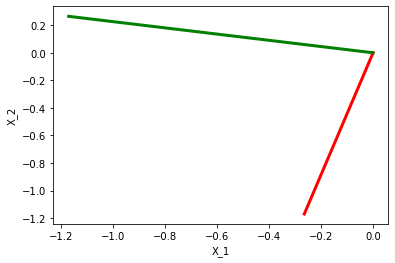

In [88]:
#%% Plot the Principal Directions
pd_1 = Gamma[:, 0]
pd_2 = Gamma[:, 1]

arrow_scale = 1.2

plt.plot([mu_1, mu_1 + pd_1[0]*arrow_scale], 
         [mu_2, mu_2 + pd_1[1]*arrow_scale], 'r',  linewidth=3)
plt.plot([mu_1, mu_1 + pd_2[0]*arrow_scale], 
         [mu_2, mu_2 + pd_2[1]*arrow_scale], 'g',  linewidth=3)

plt.xlabel("X_1")
plt.ylabel("X_2")

pd_1 = pd_1[:, np.newaxis]
pd_2 = pd_2[:, np.newaxis]

print(f"gamma_1.T: {pd_1.T}")
print(f"gamma_2.T: {pd_2.T}")

[[-0.22038544 -0.97541287]]
[[-1.07133875  0.72319011  2.60800009  1.89416193 -1.40747047]
 [-5.16843434  0.26878255  5.95806809 -0.80542276 -3.64365394]]
The Y bitch
[[ 5.27746481 -0.42155452 -6.38634151  0.36817402  3.86425292]]
[[-0.09405006 -0.64617318 -1.23080541 -2.02509336  0.56985654]]


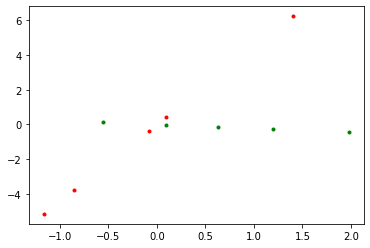

In [108]:
Y_1 = pd_1.T @ (X - mu)
Y_2 = pd_2.T @ (X - mu)

print(pd_1.T)
print(X-mu)
print('The Y bitch')
print(Y_1)
print(Y_2)

coords_1 = Y_1 * pd_1
plt.plot(mu_1 + coords_1[0,:], mu_2 + coords_1[1, :], 'r.')

coords_2 = Y_2 * pd_2
plt.plot(mu_1 + coords_2[0,:], mu_2 + coords_2[1, :], 'g.')

In [90]:
#%% Display the Variance of Each Projection
var_1 = np.var(Y_1)
var_2 = np.var(Y_2)

print(f"Var of pd_1.T @ (X - mu): {var_1}")
print(f"Var of pd_2.T @ (X - mu): {var_2}")

assert (var_1 >= var_2), "RError: Y is not sorted by variance."



Var of pd_1.T @ (X - mu): 16.48450948929672
Var of pd_2.T @ (X - mu): 0.8038295468459224


Text(0, 0.5, 'Y_2')

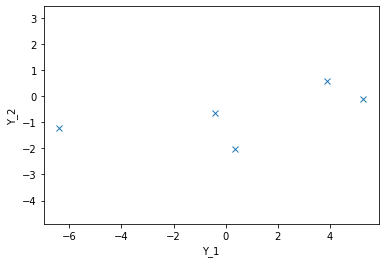

In [91]:
#%% Plot the Transformed Data
plt.figure(1)
plt.plot(Y_1[0, :], Y_2[0, :], 'x')
plt.axis('equal')
plt.xlabel("Y_1")
plt.ylabel("Y_2")

In [92]:
#%% Confirm the Properties of Y
Y = np.vstack((Y_1, Y_2))
cov_Y = np.cov(Y) # Must approximate Lambda
E_Y = np.mean(Y, axis=1) # Must approximate 0
print(E_Y)

[ 0.54039914 -0.68525309]


[[-1.16307638  0.09290448  1.40745666 -0.08114019 -0.85162507]
 [-5.14770707  0.41118971  6.22931967 -0.35912168 -3.76924202]]


Text(0, 0.5, 'X_model_2')

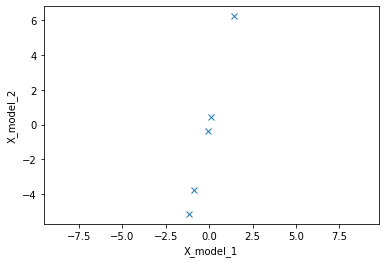

In [110]:
#%% Principle Components as Factors
Gamma_1 = pd_1
Gamma_2 = pd_2

X_test = mu + Gamma_1 * Y_1 + Gamma_2 * Y_2
X_model = mu + Gamma_1 * Y_1
print(X_model)

plt.figure(2)
plt.plot(X_model[0, :], X_model[1, :], 'x')
plt.axis('equal')
plt.xlabel("X_model_1")
plt.ylabel("X_model_2")